In [1]:
import pandas as pd

# Replace 'your_file.xlsx' with the actual path to your Excel file
file_path = r'C:\Users\C5821119\Downloads\pone.0212445.s004.xlsx'

# Read the Excel file into a DataFrame, considering the first row as the header
data = pd.read_excel(file_path, header=1)

# Now, 'df' contains the data from your Excel file with the first row as the header
print(data)



                     District Code     Estimate  Prevalence_%  Prevalence_LCL  \
0                Buffalo City  BUF       Survey     13.600000       10.268000   
1                Buffalo City  BUF  Fay-Heriott     13.501283       11.031605   
2           City of Cape Town  CPT       Survey      5.200000        3.044000   
3           City of Cape Town  CPT  Fay-Heriott      6.020043        4.335072   
4                  West Coast  DC1       Survey      2.700000        0.000000   
..                        ...  ...          ...           ...             ...   
99                   Mangaung  MAN  Fay-Heriott      9.147425        6.725917   
100  Nelson Mandela Bay Metro  NMA       Survey      8.300000        3.400000   
101  Nelson Mandela Bay Metro  NMA  Fay-Heriott      9.054060        6.128703   
102           City of Tshwane  TSH       Survey     11.700000        7.388000   
103           City of Tshwane  TSH  Fay-Heriott     11.024858        8.255934   

     Prevalence_UCL  NoPLHI

In [2]:
df = pd.DataFrame(data)

In [3]:
df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789


In [51]:
print(df.columns)

Index(['District', 'Code', 'Estimate', 'Prevalence_%', 'Prevalence_LCL',
       'Prevalence_UCL', 'NoPLHIV', 'NoPLHIV_LCL', 'NoPLHIV_UCL'],
      dtype='object')


In [4]:
# Assuming 'Estimate Type' is the correct column name, update it accordingly
estimate_type_column = 'Estimate'

# Filter data for Survey estimates
survey_data = df[df[estimate_type_column] == 'Survey']

# Calculate total NoPLHIV from Survey estimates
total_no_plhiv_survey = survey_data['NoPLHIV'].sum()

# Output the result
print(f'Total NoPLHIV based on Survey estimates: {total_no_plhiv_survey}')

Total NoPLHIV based on Survey estimates: 6409903


In [5]:
# Assuming 'Xhariep' is the correct district name, update it accordingly
district_name = 'Xhariep'

# Filter data for the specified district and both estimate types
xhariep_data = df[(df['District'] == district_name) & (df['Estimate'].isin(['Survey', 'Fay-Heriott']))]

# Calculate the average NoPLHIV for Xhariep
average_noplhiv_xhariep = xhariep_data['NoPLHIV'].mean()

# Output the result
print(f'Average NoPLHIV for {district_name}: {average_noplhiv_xhariep}')

Average NoPLHIV for Xhariep: 12247.5


In [6]:
df['NoNotPLHIV'] = df['NoPLHIV']*(100-df['Prevalence_%'])/df['Prevalence_%']

In [7]:
df

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,NoNotPLHIV
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,6.507762e+05
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,6.515169e+05
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3.659845e+06
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3.628178e+06
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,4.072906e+05
...,...,...,...,...,...,...,...,...,...,...
99,Mangaung,MAN,Fay-Heriott,9.147425,6.725917,12.325536,101520,74646,136792,1.008301e+06
100,Nelson Mandela Bay Metro,NMA,Survey,8.300000,3.400000,13.200000,97459,39923,154995,1.076746e+06
101,Nelson Mandela Bay Metro,NMA,Fay-Heriott,9.054060,6.128703,13.179704,106313,71964,154757,1.067889e+06
102,City of Tshwane,TSH,Survey,11.700000,7.388000,16.012000,361450,228239,494661,2.727866e+06


In [8]:
# Assuming districts with "city" or "metro" in the name are considered cities
city_data = df[df['District'].str.lower().str.contains('city|metro', regex=True)]

# Calculate total NoPLHIV for cities
total_noplhiv_cities = city_data['NoPLHIV'].sum()

# Output the result
print(f'Total NoPLHIV in cities: {total_noplhiv_cities}')

Total NoPLHIV in cities: 2572733


In [9]:
# Remove special/non-alphabetic characters from column names
df.columns = df.columns.str.replace(r'[^a-zA-Z]', '', regex=True)

# Output the updated column names
print(df.columns)

Index(['District', 'Code', 'Estimate', 'Prevalence', 'PrevalenceLCL',
       'PrevalenceUCL', 'NoPLHIV', 'NoPLHIVLCL', 'NoPLHIVUCL', 'NoNotPLHIV'],
      dtype='object')


In [28]:
import matplotlib.pyplot as plt

# Replace column names with the correct ones
filtered_data = df[(df['District'].str.lower().str.endswith('i')) & (df['Estimate'] == 'Fay-Heriott')]

Using matplotlib, plot each Prevalence confidence interval (Prevalence_UCL and Prevalence_LCL) for Districts that end in “i”; according to Fay-Herriott estimates on 1 graph.

In [29]:
filtered_data

,District,Code,Estimate,Prevalence,PrevalenceLCL,PrevalenceUCL,NoPLHIV,NoPLHIVLCL,NoPLHIVUCL,NoNotPLHIV
11,Chris Hani,DC13,Fay-Heriott,14.080983,11.181220,17.583893,113090,89801,141224,6.900500e+05
13,Joe Gqabi,DC14,Fay-Heriott,11.507804,9.291766,14.169794,40618,32796,50013,3.123425e+05
25,Fezile Dabi,DC20,Fay-Heriott,10.030754,7.811309,12.793304,50767,39534,64748,4.553465e+05
33,uMzinyathi,DC24,Fay-Heriott,18.097578,16.845087,19.421445,93061,86620,99868,4.211570e+05
51,Ehlanzeni,DC32,Fay-Heriott,15.820960,12.012425,20.554906,271179,205899,352321,1.442870e+06
53,Mopani,DC33,Fay-Heriott,11.294971,7.921185,15.858238,87157,61123,122369,6.844873e+05
65,Dr Ruth Segomotsi Mompati,DC39,Fay-Heriott,11.045235,8.164344,14.779090,52136,38538,69761,4.198866e+05
93,Ekurhuleni,EKU,Fay-Heriott,13.678908,10.647292,17.405572,441990,344033,562405,2.789189e+06
95,eThekwini,ETH,Fay-Heriott,14.537772,11.791222,17.795017,503618,408472,616456,2.960585e+06


In [74]:
filtered_data

,District,Code,Estimate,Prevalence,PrevalenceLCL,PrevalenceUCL,NoPLHIV,NoPLHIVLCL,NoPLHIVUCL,NoNotPLHIV


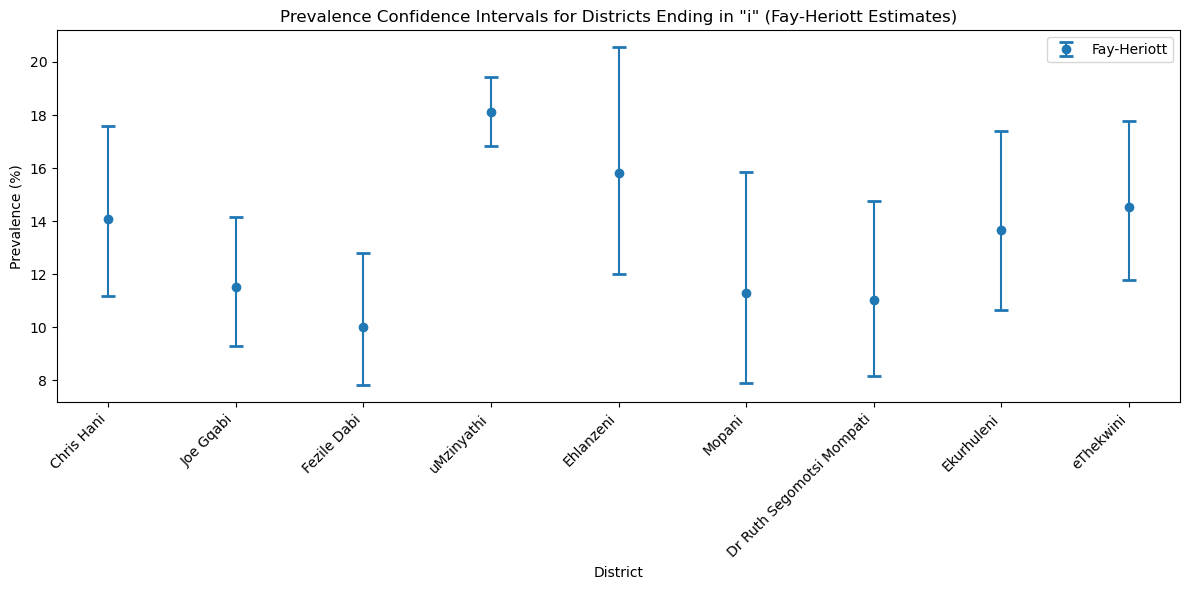

In [31]:
import matplotlib.pyplot as plt

# Replace column names with the correct ones
filtered_data = df[(df['District'].str.lower().str.endswith('i')) & (df['Estimate'] == 'Fay-Heriott')]

# Plot the confidence intervals
plt.figure(figsize=(12, 6))
plt.errorbar(filtered_data['District'], filtered_data['Prevalence'],
             yerr=[filtered_data['Prevalence'] - filtered_data['PrevalenceLCL'],
                   filtered_data['PrevalenceUCL'] - filtered_data['Prevalence']],
             fmt='o', label='Fay-Heriott', capsize=5, capthick=2)

# Customize the plot
plt.title('Prevalence Confidence Intervals for Districts Ending in "i" (Fay-Heriott Estimates)')
plt.xlabel('District')
plt.ylabel('Prevalence (%)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()